<a href="https://www.kaggle.com/code/haticebaydemir/large-scale-fish-classification?scriptVersionId=203133824" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **1. Kütüphanelerin İçe Aktarılması**

In [ ]:
# Gerekli kütüphanelerin içe aktarılması
import numpy as np  # Sayısal işlemler için kütüphane
import pandas as pd  # Veri analizi ve veri yapıları için kütüphane
import os  
import warnings  # Uyarı mesajlarını yönetmek için
import matplotlib.pyplot as plt  # Grafik çizimi için kütüphane
import seaborn as sns  # Gelişmiş veri görselleştirme kütüphanesi
from sklearn.preprocessing import LabelEncoder  # Etiketleri sayısal değerlere dönüştürmek için
from sklearn.model_selection import train_test_split  # Veri setini eğitim ve test olarak bölmek için
from sklearn.metrics import classification_report, confusion_matrix  # Sınıflandırma raporu ve karmaşıklık matrisi hesaplama

# TensorFlow ve Keras modülleri
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Görüntü verilerini artırmak için
from tensorflow.keras.models import Sequential  # Keras model yapısı (ardışık model)
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D  # Sinir ağı katmanları
from tensorflow.keras.optimizers import Adam  # Optimizer olarak Adam kullanımı
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Erken durdurma ve model kontrolü için geri çağırımlar

# Uyarıları gizle
warnings.filterwarnings("ignore")  # Çalışma sırasında oluşan uyarıları gizler

# **2. Veri Dizininin Ayarlanması**

In [ ]:
# Veri dizinini ayarlayın
directory = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"

* **Veri Dizinini Ayarlama**: Bu bölüm, balık görüntülerinin bulunduğu veri kümesi dizinini ayarlamak için kullanılır. *directory* değişkeni, balık görüntüleri veri setine erişim sağlamak amacıyla, yolunu belirtir.

# **3. Veri Yükleme Fonksiyonu**

In [ ]:
# Veri Yükleme Fonksiyonu
def load_data(directory):
    label = []
    path = []
    
    # Verilerin bulunduğu dizinde döngü oluştur
    for dir_name, _, filenames in os.walk(directory):
        for filename in filenames:
            # Görüntü dosyalarını yükle
            if dir_name.split()[-1] != 'GT' and filename.endswith('.png'):
                label.append(os.path.split(dir_name)[-1])  # Klasör adını etiket olarak kullan
                path.append(os.path.join(dir_name, filename))  # Dosya yolunu ekle
    
    # DataFrame oluştur
    data = pd.DataFrame({'path': path, 'label': label})
    return data

* **Veri Yükleme**: Bu fonksiyon, belirttiğimiz dizindeki görsel dosyalarını (balık resimleri) yükler. Her bir resim için etiket (balığın türü) ve dosya yolu (resmin nerede bulunduğu) toplanır. Sonuç olarak, bu bilgiler bir veri çerçevesinde (DataFrame) saklanır.

# **4. Veri Setinin Yüklenmesi ve Kontrolü**

In [ ]:
# Veri setini yükleyin
data = load_data(directory)

# Veri kontrolü
print("Yüklenen veri:")
print(data.head())
print("\nEtiket dağılımı:")
print(data.label.value_counts())

# Eksik değer kontrolü
print("\nEksik değer kontrolü:")
print(data.isnull().sum())

* **Veri Setinin Yüklenmesi**: *load_data* fonksiyonunu çağırarak verileri yükleriz.
 
* **Veri Kontrolü**: Yüklenen verilerin ilk birkaç satırını gösteririz. Bu sayede hangi bilgileri aldığımızı görebiliriz.
  
* **Etiket Dağılımı**: Hangi balık türünden ne kadar olduğunu sayarız. Örneğin, "Gilt-Head Bream" türünden kaç tane resim olduğunu öğreniriz.
  
* **Eksik Değer Kontrolü**: Herhangi bir boş veri var mı diye kontrol ederiz. Eğer varsa, bu sorunları çözmemiz gerekebilir.



# **5. Görselleştirme Fonksiyonu**

In [ ]:
# Görselleştirme Fonksiyonu
def visualize_samples(data):
    unique_data = data.groupby('label').first().reset_index() # Her etiket için ilk görüntüyü seçerek benzersiz görüntüleri al
    num_images = len(unique_data)
    ncols = 5 # Her satırda kaç resim olacağı
    nrows = (num_images // ncols) + (num_images % ncols > 0)
   # Görüntü yerleşimini ayarla
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 3),
                             subplot_kw={'xticks': [], 'yticks': []})

    axes = axes.flatten() if nrows > 1 else [axes]
   # Her benzersiz görüntüyü görsel alana ekle
    for i, ax in enumerate(axes[:num_images]):
        ax.imshow(plt.imread(unique_data['path'][i]))
        ax.set_title(unique_data['label'][i])
   # Eğer görüntü sayısından fazla eksen varsa, bu eksenleri kaldır
    for ax in axes[num_images:]:
        ax.remove()

    plt.tight_layout()
    plt.show()

# Görselleştirme fonksiyonunu çağırın
visualize_samples(data) # 'data' değişkenindeki görüntüleri ve etiketleri görselleştir

* **Görselleştirme**: Bu fonksiyon, veri setindeki balık türlerinin ilk örneklerini görselleştirir. Her balık türü için bir görüntü seçilir ve başlık olarak tür adı eklenir. Amaç, veri setinde hangi türlerin olduğunu hızlıca görselleştirerek veri hakkında genel bir fikir edinmektir.

# **6. Sınıf Dağılımı Görselleştirmesi**

In [ ]:
# Sınıf dağılımını çubuk grafiği ile gösterme
colors = np.random.rand(data['label'].value_counts().size, 3)

plt.figure(figsize=(10, 5)) #Grafik boyutu 
data['label'].value_counts().plot(kind='bar', color=colors)
plt.title('Balık Türlerinin Dağılımı') #Başlık
plt.xlabel('Balık Türleri')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

* **Sınıf Dağılımı Grafiği**: Bu bölümde, her balık türünün ne kadar bulunduğunu gösteren bir çubuk grafiği oluştururuz. Bu grafik, hangi türlerin daha fazla olduğunu anlamamıza yardımcı olur.

# **7. Etiket Dönüşümü ve Veri Setinin Ayırma**

In [ ]:
# Etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label']) # Kategorik etiketleri sayısal değerlere dönüştür
data['label'] = data['label'].astype(str)  # Etiketleri tekrar string'e dönüştür

# Veri setini ayırma
train_df, test_df = train_test_split(data, train_size=0.8, shuffle=True, random_state=1) # Veri setini %80 eğitim ve %20 test olarak ayır
print(f"Eğitim veri seti boyutu: {len(train_df)}")
print(f"Test veri seti boyutu: {len(test_df)}")

* **LabelEncoder Oluşturma**: LabelEncoder, *sklearn.preprocessing* modülünden bir sınıftır ve bu sınıf, kategorik (metin) verileri sayısal değerlere dönüştürmek için kullanılır.
  
   **Neden Kullanılır?**
    *  Model Eğitimi: Çoğu makine öğrenimi algoritması sayısal verilerle çalışır, bu yüzden kategorik verilerin sayıya dönüştürülmesi gerekir.
    *  Veri İşleme: Sayısal verilerle çalışmak, analizleri ve işlemleri daha hızlı ve verimli hale getirir.

   **Nasıl Çalışır?**
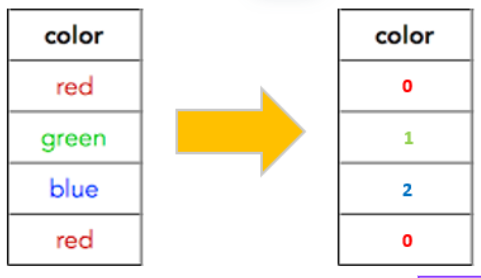



* **Veri Setinin Ayırma**: Veriyi eğitim (modelin öğrenmesi için) ve test (modelin doğruluğunu kontrol etmek için) olarak ayırıyoruz. Genellikle verilerin %80'i eğitim, %20'si test için kullanılır.

# **8. Veri Artırma ve Normalizasyon**

In [ ]:
# Veri artırma ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalizasyon: Piksel değerlerini 0-255 aralığından 0-1 aralığına çevirir.
    rotation_range=40,           # Rastgele döndürme: Görüntüleri 0-40 derece arasında rastgele döndürür.
    width_shift_range=0.2,       # Yatay kaydırma: Görüntüleri yatay olarak %20 oranında kaydırır.
    height_shift_range=0.2,      # Dikey kaydırma: Görüntüleri dikey olarak %20 oranında kaydırır.
    shear_range=0.2,             # Kesme: Görüntüleri rastgele kesme uygulayarak değiştirir.
    zoom_range=0.2,              # Yakınlaştırma: Görüntüleri %20 oranında yakınlaştırır.
    horizontal_flip=True,        # Yatay çevirme: Görüntüleri yatay olarak çevirir (sağdan sola).
    fill_mode='nearest',         # Doldurma modu: Doldurma yapılacak alan için en yakın piksel değerini kullanır.
    validation_split=0.2         # Doğrulama için veri ayırma: Veri setinin %20'sini doğrulama için ayırır.
)

# Test veri seti için yalnızca normalizasyon
test_datagen = ImageDataGenerator(rescale=1./255)  # Test verileri sadece normalizasyon işlemi uygulanır.

1. **Veri artırma (Data Augmentation)**:
  * Eğitim verisini daha çeşitli hale getirmek için kullanılır. Bu, modelin genelleme yeteneğini artırır ve aşırı uyum (overfitting) riskini azaltır. Farklı dönüşümler, modelin çeşitli görseller üzerinde daha iyi performans göstermesine yardımcı olur.
  * Uygulanan Dönüşümler:
    * *rotation_range*: Görüntüleri 0-40 derece arasında rastgele döndürür. Bu, modelin döndürülmüş görsellerle başa çıkma yeteneğini artırır.
    * *width_shift_range*: Görüntüleri yatay olarak %20 oranında kaydırır. Bu, farklı konumlarda nesnelerin tanınmasını sağlar.
    * *height_shift_range*: Görüntüleri dikey olarak %20 oranında kaydırır. Bu, yukarı ve aşağı kaydırma ile modelin genel nesne tanıma yeteneğini artırır.
    * *shear_range*: Görüntülere rastgele kesme uygular, böylece perspektif değişikliklerini simüle eder.
    * *zoom_range*: Görüntüleri %20 oranında yakınlaştırır. Bu, modelin farklı ölçeklerde nesneleri tanımasına yardımcı olur.
    * *horizontal_flip*: Görüntüleri yatay olarak çevirir (sağdan sola). Bu, simetrik nesnelerin tanınmasını kolaylaştırır.
    * *fill_mode*: Doldurma işlemi sırasında boş alanlar için en yakın piksel değerini kullanır. Bu, dönüşüm sonrası görselin estetik açıdan düzgün görünmesini sağlar.
    * *validation_split*: Eğitim veri setinden %20'sinin doğrulama için ayrılmasını sağlar. Bu, modelin öğrenme sürecinde gelişimini izlemek için önemlidir.

2. **Normalizasyon**:
   * Normalizasyon, verilerin belirli bir aralığa (genellikle 0 ile 1 arasında) dönüştürülmesi işlemidir.

     Neden Önemlidir?
     1. Farklı Ölçekleri Dengeler: Veriler farklı ölçeklerde olduğunda, bazı özellikler modelin kararlarını daha fazla etkileyebilir. Normalizasyon, tüm verileri aynı ölçeğe getirir.
     2. Hızlı Öğrenme: Normalizasyon, modelin daha hızlı öğrenmesini sağlar ve performansını artırır.
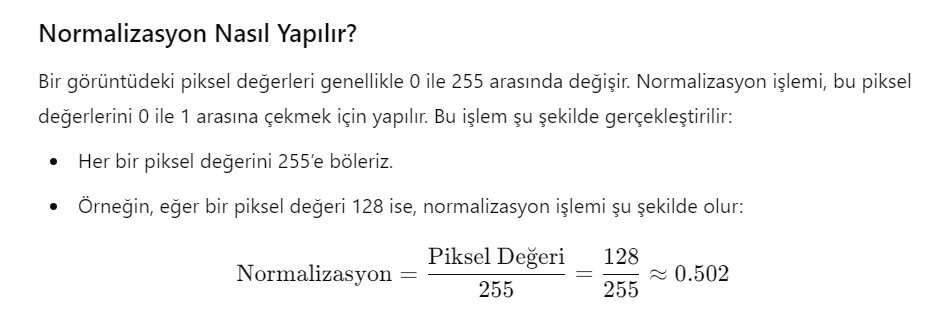

3.  **Test veri seti**:
   * Test veri setinde yalnızca normalizasyon işlemi uygulanır. Veri artırma işlemleri genellikle test aşamasında yapılmaz çünkü modelin performansını gerçekte görmek için orijinal görüntüler kullanılmalıdır. Bu, modelin genel performansını ve doğruluğunu daha iyi değerlendirmeye yardımcı olur.


# **9. Eğitim, Doğrulama ve Test Veri Setlerinin Oluşturulması**

In [ ]:
# Eğitim veri setini oluştur
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),  # Görüntü boyutu (224x224 piksel)
    batch_size=32,            # Her seferinde işlenecek görüntü sayısı (32 görüntü).
    class_mode='sparse',      # Sınıf modunu sayısal değer olarak ayarla
    subset='training',        # Eğitim alt kümesi
    shuffle=True              # Karıştırma
)

# Doğrulama veri setini oluştur
validation_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),  # Hedef boyut
    batch_size=32,
    class_mode='sparse',      # Sınıf modunu sayısal değer olarak ayarla
    subset='validation',      # Doğrulama alt kümesi
    shuffle=True              # Karıştırma
)

# Test veri setini oluştur
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),  # Hedef boyut
    batch_size=32,
    class_mode='sparse',      # Sınıf modunu sayısal değer olarak ayarla
    shuffle=False             # Karıştırma (test setinde genellikle kullanılmaz)
)

* **Eğitim Veri Seti**: *train_generator*, eğitim verilerini almak ve işlemek için kullanılır. Bu veri seti, modelin öğrenmesi için kullanılır.
* **Doğrulama Veri Seti**: *validation_generator*, eğitim sırasında modelin performansını değerlendirmek için kullanılır. Bu veri seti, modelin ne kadar iyi öğrendiğini kontrol etmemize yardımcı olur.
* **Test Veri Seti**: *test_generator*, modelin son performansını ölçmek için kullanılır. Eğitim tamamlandıktan sonra modelin doğruluğunu kontrol etmek için bu veri seti kullanılır.

# **10. Modelin Oluşturulması**

In [ ]:
# Modelin oluşturulması
model = Sequential()

# Konvolüsyonel katmanlar
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # İlk konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # İlk havuzlama katmanı

model.add(Conv2D(64, (3, 3), activation='relu'))  # İkinci konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # İkinci havuzlama katmanı

model.add(Conv2D(128, (3, 3), activation='relu'))  # Üçüncü konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # Üçüncü havuzlama katmanı

model.add(Conv2D(256, (3, 3), activation='relu'))  # Dördüncü konvolüsyon katmanı
model.add(MaxPooling2D(pool_size=(2, 2)))  # Dördüncü havuzlama katmanı

# Düzleştirme ve tam bağlantılı katmanlar
model.add(Flatten())  # Düzleştirme
model.add(Dense(512, activation='relu'))  # Tam bağlantılı katman
model.add(Dropout(0.5))  # Aşırı öğrenmeyi önlemek için dropout
model.add(BatchNormalization())  # Batch normalization
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Çıkış katmanı

**1. Modelin Başlatılması**
* *Sequential* Model: Katmanların sıralı bir şekilde eklendiği bir model türüdür. Her katmanın çıktısı, bir sonraki katmanın girişi olarak kullanılır. Bu, modelin katmanları arasındaki akışı kolaylaştırır.
  
**2. Konvolüsyonel Katmanlar**
* **Konvolüsyonel Katmanlar**: Görüntülerden özellikler çıkarmak için kullanılır. Resimlerin içindeki şekilleri, kenarları ve dokuları tanımak için önemlidir.
  * *Conv2D*: Bu katman, görüntülerin içine "filtreler" (3x3 boyutunda matrisler) uygulayarak özellikler çıkarır.
    * 32: Bu katmanın 32 farklı filtre kullanacağı anlamına gelir. Her biri resmin farklı bir özelliğini tanıyacak.
    * (3, 3): Filtre boyutu. 3x3'lük bir filtre, resmin küçük bir kısmını inceler.
    * *activation='relu'*: ReLU adı verilen bir matematiksel işlem uygulanır. Bu, negatif değerleri sıfıra çevirirken pozitif değerleri olduğu gibi bırakır. Bu sayede model daha iyi öğrenir.
      
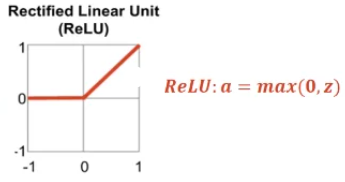
   * input_shape=(224, 224, 3): Modelin ilk katmanına giren görüntülerin boyutları. Burada 224x224 piksel boyutundaki 3 renk kanalına (kırmızı, yeşil, mavi) sahip görüntüler kullanılıyor.

**Havuzlama Katmanı**
  * *MaxPooling2D*: Bu katman, resmin boyutunu küçültmek için kullanılır.
    * pool_size=(2, 2): Burada 2x2 boyutunda bir havuzlama yapılır. Bu, resmin her 2x2'lik alanını tek bir sayı ile temsil eder, böylece modelin daha az veri ile çalışmasını sağlar. Bu sayede hem hızlı çalışır hem de önemli bilgileri korur.

**3. Düzleştirme ve Tam Bağlantılı Katmanlar**
* Düzleştirme ve tam bağlantılı katmanlar, modelin daha soyut özellikleri öğrenmesine yardımcı olur.
   * Flatten: Burada, daha önce çıkarılan özellikleri düz bir dizi haline getiriyoruz. Düşünün ki, bir tabloyu (2D) bir listeye (1D) dönüştürüyorsunuz. Bu, verilerin sonraki katmanlara geçişi için gereklidir.
   * *Dense*: Bu katman, "tam bağlantılı" bir katmandır. Yani, önceki katmandaki tüm nöronlar (çalışan parçalar) bu katmandaki her nöronla bağlantılıdır.
     * 512: Bu katmanda 512 nöron var. Daha fazla nöron, modelin daha karmaşık ilişkileri öğrenmesine yardımcı olur.
   
**4. Aşırı Öğrenmeyi Önleme**
* *Dropout*: Bu, modelin bazı nöronlarını rastgele kapatır. Bu sayede model, bazı nöronlara fazla bağımlı hale gelmez ve daha iyi genelleme yapar.
  * 0.5: Eğitim sırasında nöronların %50'sinin kapatılacağı anlamına gelir.
 
**5. Son Katman**
* Çıkış Katmanı: Bu, modelin tahmin yapacağı son katmandır.
  * len(label_encoder.classes_): Bu, sınıflandırılacak etiketlerin sayısını belirtir. Örneğin, 3 farklı nesne tanıyorsa bu değer 3 olur.
  * activation='softmax': Bu, modelin her sınıf için bir olasılık değeri döndürmesini sağlar. En yüksek olasılığa sahip sınıf, modelin tahmin ettiği sınıf olarak kabul edilir.
  
    **Softmax nedir?**
    * Softmax, çok sınıflı sınıflandırma problemlerinde kullanılan bir aktivasyon fonksiyonudur ve modelin çıktısını olasılıklara dönüştürerek hangi sınıfın daha olası olduğunu belirlemede yardımcı olur. Bu özellik, derin öğrenme modellerinin karar verme süreçlerini anlamlı hale getirir.
 


**Özet**
Bu kod, görüntü tanıma yapacak bir model oluşturur. Model, görüntülerdeki önemli özellikleri çıkarmak, bu özellikleri anlamak ve sonunda hangi sınıfa ait olduğunu tahmin etmek için farklı katmanlar kullanır. Konvolüsyonel katmanlar, özellikleri çıkarmak için; havuzlama katmanları, boyutları küçültmek için; düzleştirme ve tam bağlantılı katmanlar ise, daha karmaşık ilişkileri öğrenmek için kullanılır. Dropout ise aşırı öğrenmeyi önleyerek modelin genel başarısını artırır.

# **11. Modelin Derlenmesi**

In [ ]:
# Modelin derlenmesi
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

* **Modelin Derlenmesi**: Modelin çalışabilmesi için derlenmesi gerekir. *Adam*, optimizasyon algoritmasıdır. *loss*, kayıp fonksiyonudur; bu, modelin ne kadar yanlış tahmin yaptığını ölçer. *metrics*, modelin doğruluğunu değerlendirmek için kullanılır.

**Adam optimizasyon algoritması nedir?**
* Adam, makine öğrenimi ve derin öğrenme alanında yaygın olarak kullanılan bir optimizasyon algoritmasıdır. Adı, "Adaptive Moment Estimation" (Uyarlanabilir Moment Tahmini) ifadesinin kısaltmasıdır. Her ağırlık için uyarlanabilir öğrenme hızları kullanarak daha hızlı ve etkili öğrenme sağlar. Gradyanların ortalamasını alarak ve momentleri tahmin ederek modelin daha stabil bir şekilde öğrenmesini sağlar. Adam, genellikle yüksek performans ve verimlilik sağladığı için tercih edilmektedir.

# **12. Eğitim için Geri Çağırmaların Tanımlanması**

In [ ]:
# Erken durdurma ve model kaydetme geri çağırmaları
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

**1. Erken Durdurma (Early Stopping):**
* Amaç: Modelin aşırı öğrenmesini (overfitting) önlemek.
* *Monitor*: 'val_loss' kullanarak doğrulama kaybını izler.
* *Patience*: Modelin kaybını iyileştirmediği takdirde 5 epoch (dönem) bekler ve sonra durdurur.
* *Restore Best Weights*: En iyi ağırlıkları geri yükler, böylece eğitim sonunda en iyi performansı elde eden model kullanılır.

**2. Model Kaydetme (Model Checkpoint):**
* Amaç: Modelin en iyi performans gösterdiği anı kaydetmek.
* Dosya Adı: '*best_model.keras*' ile en iyi modelin ağırlıkları kaydedilir.
* *Save Best Only*: Yalnızca en düşük doğrulama kaybı olan modelin ağırlıkları kaydedilir.

**Genel Kullanım**
* Bu geri çağırmalar, modelin eğitim sürecini optimize eder. Erken durdurma aşırı öğrenmeyi engellerken, model kaydetme, en iyi performansa sahip modeli saklayarak gelecekte kullanılmasını sağlar.

# **13. Modelin Eğitilmesi**

In [ ]:
# Modelin eğitilmesi
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1  # Eğitim sürecinin detaylarını gösterir
)

1. **Modelin Eğitilmesi**:
   * fit Fonksiyonu: Modeli eğitim verileri ile eğitir.
   * train_generator: Eğitim verilerini sağlar.
   * validation_data: Modelin doğrulama setindeki performansını izler.
   * epochs: Modelin veriler üzerinde kaç kez çalışacağını belirler (30 kez).
   * verbose: Eğitim sürecinin ayrıntılarını gösterir.


2. **Callback'ler**
   * EarlyStopping: Aşırı öğrenmeyi önlemek için, modelin kaybı iyileşmiyorsa eğitimi durdurur.
   * ModelCheckpoint: En iyi doğrulama kaybına sahip modeli kaydeder.

**Not:**
* *history*: Eğitim sürecinde elde edilen kayıplar ve doğruluklar gibi bilgileri saklar

# **14. Modelin Değerlendirilmesi**

In [ ]:
# Modelin değerlendirilmesi
loss, accuracy = model.evaluate(test_generator)
print(f"\nTest kaybı: {loss:.4f}")
print(f"Test doğruluğu: {accuracy:.4f}")

**1. Modeli Değerlendirme:**
* *model.evaluate(test_generator)*: Test veri seti üzerinde modelin performansını ölçer ve kaybı (loss) ile doğruluğu (accuracy) hesaplar.
  
**2. Sonuçların Yazdırılması:**
* *print()* fonksiyonları, test kaybını ve doğruluğunu ekrana yazdırır. *:.4f* formatı, değerlerin dört ondalık basamakla gösterilmesini sağlar.

**Genel Amaç**
* Bu kod, modelin test verileri üzerindeki başarısını değerlendirmek için kullanılır. Düşük kayıp ve yüksek doğruluk, modelin iyi performans gösterdiğini ve yeni verilerle genelleme yapabildiğini gösterir.

# **15. Tahminlerin Yapılması ve Sonuçların Görselleştirilmesi**

In [ ]:
# Tahminler yapma
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # En yüksek olasılığa sahip sınıfları al

# Confusion Matrix ve Classification Report
cm = confusion_matrix(test_generator.classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıflar')
plt.ylabel('Gerçek Sınıflar')
plt.show()

# Sınıflar için sınıflandırma raporu
print(classification_report(test_generator.classes, predicted_classes, target_names=label_encoder.classes_))

1. **Tahminler Yapma**:
   * *model.predict(test_generator)*: Test veri seti üzerinde modelin tahminlerini yapar ve her sınıf için olasılık değerlerini döndürür.
   * *np.argmax(predictions, axis=1)*: Olasılık değerleri arasından en yüksek olanını seçer ve bu sınıfları belirler. *axis=1*, her satır (her görüntü) için en yüksek değerin indeksini alır.

  
2. **Confusion Matrix (Karmaşa Matrisi)**:
   * *confusion_matrix(test_generator.classes, predicted_classes)*: Gerçek sınıflar ve tahmin edilen sınıflar arasındaki karşılaştırmayı yapar. Bu matris, modelin hangi sınıfları doğru tahmin ettiğini ve hangi sınıflarda hata yaptığını gösterir.
   * *sns.heatmap(...)*: Karmaşa matrisini görselleştirir. *annot=True* ile hücrelere sayılar yazdırılır. *fmt='d'* ise sayıları tam sayı olarak gösterir. *cmap='Blues'* renk paletini ayarlar.
   * Grafik başlıkları ve eksen etiketleri, görüntülerin anlamını artırır.


3. **Sınıflandırma Raporu**:
   * *classification_report(...)*: Her sınıf için precision (kesinlik), recall (duyarlılık) ve F1 skoru gibi metrikleri hesaplar ve yazdırır. Bu metrikler, modelin performansını daha ayrıntılı bir şekilde değerlendirir.
   * *target_names=label_encoder.classes_*: Sınıf isimlerini raporda göstermek için kullanılır.

  
**Genel Amaç:**
* Bu kod, modelin test verileri üzerindeki tahminlerini değerlendirmek için kullanılır. Karmaşa matrisi, modelin hangi sınıfları doğru veya yanlış tahmin ettiğini görselleştirirken, sınıflandırma raporu, her bir sınıf için performans metriklerini sağlar. Bu bilgiler, modelin güçlü ve zayıf yönlerini belirlemede yardımcı olur.

# Confusion Matrix Nedir?
Karmaşa matrisi (confusion matrix), bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir araçtır. Bu matris, modelin tahmin ettiği sınıflar ile gerçek sınıflar arasındaki ilişkiyi gösterir. 
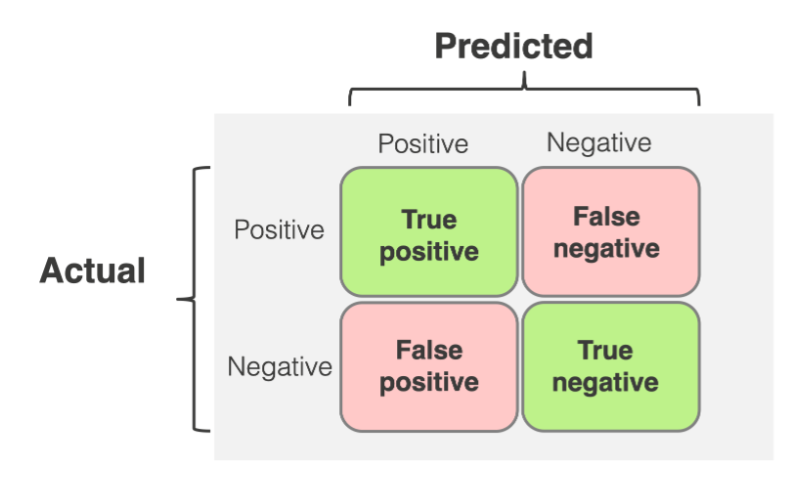

Burada:

* **TP (True Positive)**: Modelin doğru bir şekilde pozitif sınıfı tahmin ettiği durumlar. Yani, modelin pozitif olduğunu doğru bir şekilde tahmin ettiği örnek sayısı.
* **TN (True Negative)**: Modelin doğru bir şekilde negatif sınıfı tahmin ettiği durumlar. Yani, modelin negatif olduğunu doğru bir şekilde tahmin ettiği örnek sayısı.
* **FP (False Positive)**: Modelin yanlış bir şekilde pozitif sınıfı tahmin ettiği durumlar. Yani, modelin negatif olan bir örneği pozitif olarak tahmin ettiği durum.
* **FN (False Negative)**: Modelin yanlış bir şekilde negatif sınıfı tahmin ettiği durumlar. Yani, modelin pozitif olan bir örneği negatif olarak tahmin ettiği durum.

**Karmaşa Matrisinin Önemi**
* **Performans Analizi**: Karmaşa matrisi, modelin hangi sınıfları doğru tahmin ettiğini ve hangi sınıflarda hata yaptığını göstererek performans analizi yapmayı sağlar.
* **Hata Türlerini Anlama**: Modelin hangi tür hatalar yaptığını anlamanıza yardımcı olur. Örneğin, çok sayıda FP varsa, modelin yanlış pozitif tahminleri yüksek demektir.
* **Metrikler Hesaplama**: Karmaşa matrisinden çeşitli metrikler hesaplanabilir:
* * **Kesinlik (Precision)**: TP / (TP + FP)
  * **Duyarlılık (Recall)**: TP / (TP + FN)
  * **F1 Skoru**: 2 * (Precision * Recall) / (Precision + Recall)
  * **Doğruluk (Accuracy)**: (TP + TN) / (TP + TN + FP + FN)


**Uygulama Alanları**

Karmaşa matrisi, özellikle:
* **İkili Sınıflandırma Problemleri**: İki sınıf arasında ayrım yapmak için kullanılır (örneğin, hastalık var/yok).
* **Çok Sınıflı Sınıflandırma Problemleri**: Birden fazla sınıfın olduğu durumlarda da kullanılabilir.

**Özet**
* Karmaşa matrisi, sınıflandırma modellerinin değerlendirilmesinde kritik bir araçtır. Modelin tahminlerinin doğruluğunu anlamak için kullanılabilir ve modelin geliştirilmesi için önemli ipuçları sağlar.

# Kesinlik (Precision) - Duyarlılık (Recall) - F1 Skoru - Doğruluk (Accuracy)
Kesinlik (Precision), Duyarlılık (Recall), F1 Skoru ve Doğruluk (Accuracy), bir sınıflandırma modelinin performansını değerlendirmek için kullanılan önemli metriklerdir. Her biri, modelin tahminlerinin kalitesini farklı açılardan ölçer.

## 1. **Kesinlik (Precision)**
 
**Tanım**: Kesinlik, modelin pozitif olarak tahmin ettiği örneklerin ne kadarının gerçekten pozitif olduğunu ölçer.

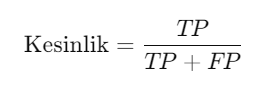

* **TP (True Positive)**: Doğru bir şekilde pozitif sınıf olarak tahmin edilen örnek sayısı.
* **FP (False Positive)**: Yanlış bir şekilde pozitif sınıf olarak tahmin edilen örnek sayısı.

**Önem**: Kesinlik, yanlış pozitiflerin (modelin negatif sınıfı yanlışlıkla pozitif olarak tahmin etmesi) etkisini minimize etmek için önemlidir. Örneğin, bir e-posta filtreleme sisteminde, kesinlik yüksekse, spam olarak işaretlenen e-postaların çoğu gerçekten spam demektir.


## 2. Duyarlılık (Recall)

**Tanım**: Duyarlılık, gerçek pozitiflerin ne kadarının doğru bir şekilde pozitif olarak tahmin edildiğini ölçer.

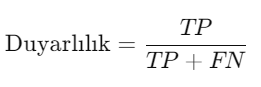

* **FN (False Negative)**: Yanlış bir şekilde negatif sınıf olarak tahmin edilen pozitif örnek sayısı.

**Önem**: Duyarlılık, modelin gerçek pozitifleri bulma yeteneğini ölçer. Tıbbi testlerde, duyarlılığın yüksek olması, hastalığı olan bireylerin doğru bir şekilde tespit edilmesi için kritik öneme sahiptir.


## 3. F1 Skoru
**Tanım**: F1 skoru, kesinlik ve duyarlılığın harmonik ortalamasıdır. İki metrik arasındaki dengeyi sağlar.

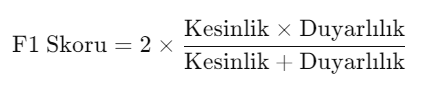

**Önem**: F1 skoru, modelin hem kesinliğini hem de duyarlılığını aynı anda dikkate alır. Özellikle, sınıfların dengesiz olduğu durumlarda (bir sınıf diğerinden çok daha fazla örneğe sahip olduğunda) F1 skoru, modelin genel performansını daha iyi yansıtabilir.


## 4. Doğruluk (Accuracy)
**Tanım**: Doğruluk, modelin doğru tahminlerinin, toplam tahminlere oranını ölçer.

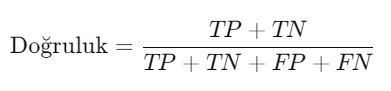

* **TN (True Negative)**: Doğru bir şekilde negatif sınıf olarak tahmin edilen örnek sayısı.

**Önem**: Doğruluk, genel olarak modelin ne kadar iyi performans gösterdiğini gösterir. Ancak, dengesiz veri setlerinde yanıltıcı olabilir. Örneğin, eğer veri setinin %95’i negatif sınıf ise, model sadece negatifleri tahmin ederek %95 doğruluk elde edebilir, bu da modelin gerçek başarısını yansıtmaz.


## **Özet**
* **Kesinlik**: Pozitif tahminlerin ne kadarının doğru olduğunu ölçer.
* **Duyarlılık**: Gerçek pozitiflerin ne kadarının doğru tahmin edildiğini ölçer.
* **F1 Skoru**: Kesinlik ve duyarlılık arasında denge sağlar.
* **Doğruluk**: Doğru tahminlerin oranını verir.

Bu metriklerin her biri, modelin performansını farklı bir açıdan değerlendirir ve hangi metriklerin daha önemli olduğunu belirlemek, uygulama bağlamına bağlıdır.
